# Models Comparison for TinyML

In [173]:
# Load libraries
import numpy as np
from numpy import arange
import pickle
#
import matplotlib.pyplot as plt

#
import pandas as pd
from pandas import read_csv

from sklearn.metrics import confusion_matrix,  classification_report, f1_score
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import tensorflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from micromlgen import port
import tinymlgen as tiny

import warnings
import seaborn as sbs
import sys

warnings.filterwarnings('ignore')

In [174]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)
np.set_printoptions(threshold=sys.maxsize)
tasks = ["2Labels", "3Labels", "4Labels", "5Labels"]
choosenIndex = 0

In [175]:
with open('data/X2.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y2.pkl', 'rb') as f:
    y = pickle.load(f)

In [176]:
n_labels = 2 + choosenIndex
samples = 150
X = X[:n_labels*samples]
y = y[:n_labels*samples]
labels = np.unique(y)

In [177]:
classes = np.unique(y).tolist()
for i in range(len(classes)):
    y = np.where(y==classes[i], i, y)

In [178]:
y = np.array([int(el) for el in y])
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)
print(X_test)
print(y_test.shape)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[[1681.61 1793.95 1284.47  688.31  831.26  326.18  198.29  185.82   80.8
   120.12   73.22  118.04  192.28  194.27  315.88  310.18  335.88  414.11
   434.93  338.98  266.97  308.11  283.55  275.53  331.38  402.95  195.61
   377.56  174.6   100.59   93.3   162.98]
 [1146.01 1995.76 2296.28 2049.1  1824.41 1645.48 1476.07 1203.49 1152.23
   550.19  211.05  243.95  253.25  235.52  245.71  153.87  158.24  123.83
   103.55   39.04   46.68   34.29   51.92   31.7   120.94   75.64   96.03
    42.45   76.5   174.95  163.42  119.99]
 [1473.04 2135.31 1910.89 2114.22 1961.72 2522.15 2194.22 1581.67 2193.98
  2572.83 2253.28  680.13  309.38  236.37  120.15  137.79   69.64   63.77
    24.43   25.14  101.39   68.47   91.94   92.24   87.96  114.5   130.06
   123.63  152.26  102.42  157.31  113.33]
 [1649.02 1464.62  913.96  928.75  401.29  260.13  285.68  253.72  314.22
   385.07  386.46  462.89  524.19  468.13  402.8   323.76  295.94  197.64
    98.44   62.97  229.19  165.9   269.29  215.75  240.68 

In [180]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [172]:
X_test.shape

(150, 32)

## Model Spotting

In [150]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'f1_macro'

In [151]:
# Spot-Check Algorithms
models = []

#models.append(('XGB', XGBClassifier(random_state=seed)))
models.append(('GNB', GaussianNB(var_smoothing=2e-9)))
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('CART' , DecisionTreeClassifier(random_state=seed)))
models.append(('SVC' , SVC(gamma=0.05, random_state=seed)))
if n_labels == 5:
    models.append(('RF', RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=250, 
                                                           max_features=9, criterion='entropy', max_depth=None,
                                                           min_samples_split=4, min_samples_leaf=1
                                                          )))

else:
    models.append(('RF', RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=50, 
                                                           max_features=5, criterion='gini', max_depth=None,
                                                           min_samples_split=4, min_samples_leaf=1
                                                          )))


In [152]:
# Cross Validation
results = []
names = []
for name, model in models:
    # Dividere dati in n = num_folds
    kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = np.array([])
    for train_idx, test_idx, in kf.split(X_train, y_train):
        X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
        X_cross_train = scaler.fit_transform(X_cross_train)
        X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
        X_cross_test = scaler.transform(X_cross_test)
        model.fit(X_cross_train, y_cross_train)  
        y_pred = model.predict(X_cross_test)
        f1s = f1_score(y_cross_test, y_pred, average="weighted")
        cv_results = np.append(cv_results, [f1s])
    results.append(cv_results)
    names.append(name)
    #msg = "%s - %f - %f" % (name, cv_results.mean(), cv_results.std())
    msg = "{} - {:.2f} {:.2f}".format(name, cv_results.mean(), cv_results.std()).replace('.', ',')
    print(msg)

GNB - 0,33 0,03
LR - 0,40 0,06
CART - 0,43 0,05
SVC - 0,54 0,06
RF - 0,58 0,04


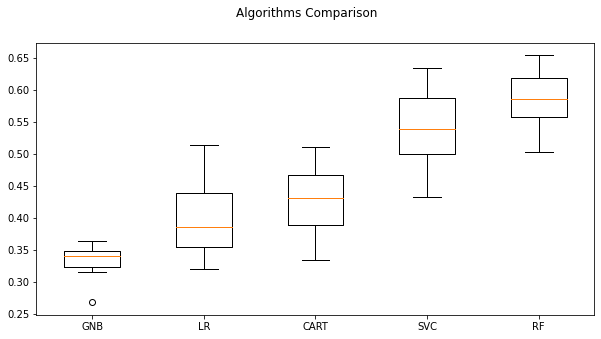

In [153]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Valutazione dei migliori algoritmi su test

## Valutazione modelli sul Test Set

In [156]:
def classification_report_csv(report, model_name):
    report_data = []
    lines = report.split('\n')
    index = 0
    row = lines[-4].split('    ')
    accuracy = row[-2] if choosenIndex > 1 else row[-3]
    for line in lines[2:-5]:
        row = {}
        row_data = line.split('      ')
        row['class'] = labels[index]
        row['precision'] = float(row_data[2]) 
        row['recall'] = float(row_data[3]) 
        row['f1_score'] = float(row_data[4])
        row['accuracy'] = accuracy
        report_data.append(row)
        index += 1
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv(tasks[choosenIndex] + "/classificationReports/" +'report' + model_name +  '.csv', index = False)
    
for name, model in models:
    model.fit(X_train,  y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print(f"Model {name}: ")
    report = classification_report(y_test, pred_test)
    print(report)
    classification_report_csv(report, name)
    print("-------------------------------------------------------------")

Model GNB: 
              precision    recall  f1-score   support

           0       0.36      0.87      0.51        30
           1       0.64      0.47      0.54        30
           2       0.32      0.27      0.29        30
           3       0.25      0.03      0.06        30
           4       0.41      0.37      0.39        30

    accuracy                           0.40       150
   macro avg       0.39      0.40      0.36       150
weighted avg       0.39      0.40      0.36       150

-------------------------------------------------------------
Model LR: 
              precision    recall  f1-score   support

           0       0.39      0.57      0.46        30
           1       0.62      0.53      0.57        30
           2       0.27      0.20      0.23        30
           3       0.36      0.40      0.38        30
           4       0.40      0.33      0.36        30

    accuracy                           0.41       150
   macro avg       0.41      0.41      0.40   

## Valutazione Inferance Rate medio (|X_test| = 40)

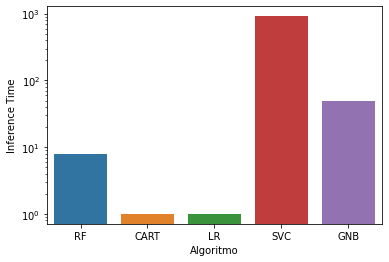

In [157]:
csv = read_csv("InfTimeReport.csv")
g = sbs.barplot(x=csv['Algoritmo'], y=csv['InfTime'])
g.set_yscale("log")
plt.ylabel("Inference Time")
plt.show()

## Memoria occupata

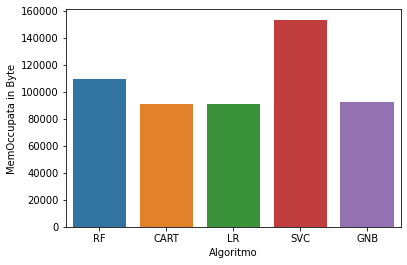

In [158]:
csv = read_csv("MemOccupationReport.csv")
sbs.barplot(x=csv['Algoritmo'], y=csv['MemOccupata2'])
plt.ylabel("MemOccupata in Byte")
plt.show()

# Neural Network

In [159]:
EPOCHS = 1000 #if labels == 3 else 500
BATCH_SIZE = 4
learn_rate = 0.00007 if labels == 3 else 0.0001
def getNetwork():
    model = Sequential(name="Sequential-NN")
    model.add(layers.Dense(X.shape[1], activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(np.unique(y).size, activation='softmax'))
    opt = Adam(learning_rate=learn_rate)
    # SGB
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

## Cross Validation NN

In [160]:
num_folds = 10

kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_results = np.array([])
for train_idx, test_idx, in kf.split(X_train, y_train):
    X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
    X_cross_train = scaler.fit_transform(X_cross_train)
    X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
    X_cross_test = scaler.transform(X_cross_test)
    model = getNetwork()
    model.fit(X_cross_train, y_cross_train, epochs=EPOCHS, batch_size=BATCH_SIZE)  
    y_pred = model.predict(X_cross_test)
    predictions_categorical = np.argmax(y_pred, axis=1)
    f1s = f1_score(y_cross_test, predictions_categorical, average="weighted")
    cv_results = np.append(cv_results, [f1s])

print(f'Average score of Cross Validation: {cv_results.mean()}')

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 5)                 1285      
Total params: 10,789
Trainable params: 10,789
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
135/135 [==============================] - 0s 467us/step - loss: 1.6556 - accuracy: 0.1796
Epoch 2/100

KeyboardInterrupt: 

## Train and Test

In [161]:
model = getNetwork()
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.25)

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_24 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 1285      
Total params: 10,789
Trainable params: 10,789
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
113/113 [==============================] - 0s 1ms/step - loss: 1.6869 - accuracy: 0.2067 - val_loss: 1

Epoch 50/1000
113/113 [==============================] - 0s 642us/step - loss: 1.1992 - accuracy: 0.5267 - val_loss: 1.3787 - val_accuracy: 0.5267
Epoch 51/1000
113/113 [==============================] - 0s 629us/step - loss: 1.1954 - accuracy: 0.5289 - val_loss: 1.3755 - val_accuracy: 0.5333
Epoch 52/1000
113/113 [==============================] - 0s 643us/step - loss: 1.1933 - accuracy: 0.5222 - val_loss: 1.3738 - val_accuracy: 0.5267
Epoch 53/1000
113/113 [==============================] - 0s 653us/step - loss: 1.1781 - accuracy: 0.5644 - val_loss: 1.3748 - val_accuracy: 0.5133
Epoch 54/1000
113/113 [==============================] - 0s 638us/step - loss: 1.1667 - accuracy: 0.5511 - val_loss: 1.3716 - val_accuracy: 0.5133
Epoch 55/1000
113/113 [==============================] - 0s 652us/step - loss: 1.1476 - accuracy: 0.5400 - val_loss: 1.3678 - val_accuracy: 0.5133
Epoch 56/1000
113/113 [==============================] - 0s 649us/step - loss: 1.1886 - accuracy: 0.5533 - val_loss: 1

Epoch 106/1000
113/113 [==============================] - 0s 666us/step - loss: 1.0713 - accuracy: 0.5911 - val_loss: 1.3049 - val_accuracy: 0.5333
Epoch 107/1000
113/113 [==============================] - 0s 665us/step - loss: 1.0252 - accuracy: 0.6111 - val_loss: 1.3046 - val_accuracy: 0.5333
Epoch 108/1000
113/113 [==============================] - 0s 656us/step - loss: 1.0668 - accuracy: 0.5844 - val_loss: 1.3058 - val_accuracy: 0.5267
Epoch 109/1000
113/113 [==============================] - 0s 636us/step - loss: 1.0620 - accuracy: 0.5933 - val_loss: 1.3041 - val_accuracy: 0.5267
Epoch 110/1000
113/113 [==============================] - 0s 649us/step - loss: 1.0826 - accuracy: 0.5956 - val_loss: 1.3056 - val_accuracy: 0.5200
Epoch 111/1000
113/113 [==============================] - 0s 632us/step - loss: 1.0324 - accuracy: 0.6222 - val_loss: 1.3023 - val_accuracy: 0.5267
Epoch 112/1000
113/113 [==============================] - 0s 650us/step - loss: 1.0476 - accuracy: 0.6289 - val_

113/113 [==============================] - 0s 653us/step - loss: 0.9585 - accuracy: 0.6533 - val_loss: 1.2770 - val_accuracy: 0.5467
Epoch 162/1000
113/113 [==============================] - 0s 634us/step - loss: 0.9355 - accuracy: 0.6467 - val_loss: 1.2729 - val_accuracy: 0.5467
Epoch 163/1000
113/113 [==============================] - 0s 665us/step - loss: 0.9732 - accuracy: 0.6378 - val_loss: 1.2765 - val_accuracy: 0.5467
Epoch 164/1000
113/113 [==============================] - 0s 667us/step - loss: 0.9619 - accuracy: 0.6333 - val_loss: 1.2804 - val_accuracy: 0.5400
Epoch 165/1000
113/113 [==============================] - 0s 649us/step - loss: 0.9597 - accuracy: 0.6378 - val_loss: 1.2810 - val_accuracy: 0.5467
Epoch 166/1000
113/113 [==============================] - 0s 663us/step - loss: 0.9888 - accuracy: 0.6311 - val_loss: 1.2812 - val_accuracy: 0.5400
Epoch 167/1000
113/113 [==============================] - 0s 637us/step - loss: 0.9645 - accuracy: 0.6333 - val_loss: 1.2848 - 

113/113 [==============================] - 0s 724us/step - loss: 0.9258 - accuracy: 0.6733 - val_loss: 1.2655 - val_accuracy: 0.5467
Epoch 217/1000
113/113 [==============================] - 0s 738us/step - loss: 0.9106 - accuracy: 0.6600 - val_loss: 1.2630 - val_accuracy: 0.5467
Epoch 218/1000
113/113 [==============================] - 0s 737us/step - loss: 0.8984 - accuracy: 0.6644 - val_loss: 1.2660 - val_accuracy: 0.5467
Epoch 219/1000
113/113 [==============================] - 0s 752us/step - loss: 0.8869 - accuracy: 0.6467 - val_loss: 1.2675 - val_accuracy: 0.5467
Epoch 220/1000
113/113 [==============================] - 0s 755us/step - loss: 0.8960 - accuracy: 0.6489 - val_loss: 1.2616 - val_accuracy: 0.5467
Epoch 221/1000
113/113 [==============================] - 0s 722us/step - loss: 0.8853 - accuracy: 0.6756 - val_loss: 1.2630 - val_accuracy: 0.5467
Epoch 222/1000
113/113 [==============================] - 0s 715us/step - loss: 0.8903 - accuracy: 0.6778 - val_loss: 1.2615 - 

113/113 [==============================] - 0s 633us/step - loss: 0.8194 - accuracy: 0.6800 - val_loss: 1.2471 - val_accuracy: 0.5333
Epoch 272/1000
113/113 [==============================] - 0s 591us/step - loss: 0.8573 - accuracy: 0.6822 - val_loss: 1.2449 - val_accuracy: 0.5333
Epoch 273/1000
113/113 [==============================] - 0s 655us/step - loss: 0.8749 - accuracy: 0.6733 - val_loss: 1.2476 - val_accuracy: 0.5333
Epoch 274/1000
113/113 [==============================] - 0s 638us/step - loss: 0.8379 - accuracy: 0.6689 - val_loss: 1.2514 - val_accuracy: 0.5400
Epoch 275/1000
113/113 [==============================] - 0s 593us/step - loss: 0.8317 - accuracy: 0.6822 - val_loss: 1.2506 - val_accuracy: 0.5400
Epoch 276/1000
113/113 [==============================] - 0s 648us/step - loss: 0.8185 - accuracy: 0.6956 - val_loss: 1.2486 - val_accuracy: 0.5400
Epoch 277/1000
113/113 [==============================] - 0s 616us/step - loss: 0.8308 - accuracy: 0.6733 - val_loss: 1.2496 - 

113/113 [==============================] - 0s 590us/step - loss: 0.7732 - accuracy: 0.7444 - val_loss: 1.2596 - val_accuracy: 0.5533
Epoch 327/1000
113/113 [==============================] - 0s 587us/step - loss: 0.8023 - accuracy: 0.6978 - val_loss: 1.2572 - val_accuracy: 0.5600
Epoch 328/1000
113/113 [==============================] - 0s 586us/step - loss: 0.7760 - accuracy: 0.7178 - val_loss: 1.2567 - val_accuracy: 0.5600
Epoch 329/1000
113/113 [==============================] - 0s 586us/step - loss: 0.7607 - accuracy: 0.7200 - val_loss: 1.2550 - val_accuracy: 0.5600
Epoch 330/1000
113/113 [==============================] - 0s 609us/step - loss: 0.8134 - accuracy: 0.7044 - val_loss: 1.2539 - val_accuracy: 0.5600
Epoch 331/1000
113/113 [==============================] - 0s 592us/step - loss: 0.7830 - accuracy: 0.7178 - val_loss: 1.2541 - val_accuracy: 0.5600
Epoch 332/1000
113/113 [==============================] - 0s 595us/step - loss: 0.8006 - accuracy: 0.6933 - val_loss: 1.2595 - 

113/113 [==============================] - 0s 594us/step - loss: 0.7136 - accuracy: 0.7467 - val_loss: 1.2582 - val_accuracy: 0.5667
Epoch 382/1000
113/113 [==============================] - 0s 583us/step - loss: 0.7474 - accuracy: 0.7244 - val_loss: 1.2620 - val_accuracy: 0.5667
Epoch 383/1000
113/113 [==============================] - 0s 613us/step - loss: 0.7159 - accuracy: 0.7378 - val_loss: 1.2667 - val_accuracy: 0.5667
Epoch 384/1000
113/113 [==============================] - 0s 669us/step - loss: 0.7534 - accuracy: 0.7178 - val_loss: 1.2625 - val_accuracy: 0.5667
Epoch 385/1000
113/113 [==============================] - 0s 605us/step - loss: 0.7718 - accuracy: 0.7000 - val_loss: 1.2709 - val_accuracy: 0.5600
Epoch 386/1000
113/113 [==============================] - 0s 586us/step - loss: 0.7247 - accuracy: 0.7244 - val_loss: 1.2717 - val_accuracy: 0.5667
Epoch 387/1000
113/113 [==============================] - 0s 590us/step - loss: 0.7364 - accuracy: 0.7311 - val_loss: 1.2673 - 

113/113 [==============================] - 0s 589us/step - loss: 0.7019 - accuracy: 0.7356 - val_loss: 1.2834 - val_accuracy: 0.5533
Epoch 437/1000
113/113 [==============================] - 0s 589us/step - loss: 0.7445 - accuracy: 0.7333 - val_loss: 1.2858 - val_accuracy: 0.5533
Epoch 438/1000
113/113 [==============================] - 0s 595us/step - loss: 0.7486 - accuracy: 0.7089 - val_loss: 1.2847 - val_accuracy: 0.5467
Epoch 439/1000
113/113 [==============================] - 0s 592us/step - loss: 0.6965 - accuracy: 0.7467 - val_loss: 1.2843 - val_accuracy: 0.5533
Epoch 440/1000
113/113 [==============================] - 0s 685us/step - loss: 0.6911 - accuracy: 0.7400 - val_loss: 1.2886 - val_accuracy: 0.5533
Epoch 441/1000
113/113 [==============================] - 0s 592us/step - loss: 0.7509 - accuracy: 0.7111 - val_loss: 1.2908 - val_accuracy: 0.5667
Epoch 442/1000
113/113 [==============================] - 0s 591us/step - loss: 0.7318 - accuracy: 0.7333 - val_loss: 1.2873 - 

113/113 [==============================] - 0s 655us/step - loss: 0.6848 - accuracy: 0.7467 - val_loss: 1.3101 - val_accuracy: 0.5600
Epoch 492/1000
113/113 [==============================] - 0s 579us/step - loss: 0.6715 - accuracy: 0.7578 - val_loss: 1.3033 - val_accuracy: 0.5600
Epoch 493/1000
113/113 [==============================] - 0s 617us/step - loss: 0.6783 - accuracy: 0.7422 - val_loss: 1.3013 - val_accuracy: 0.5600
Epoch 494/1000
113/113 [==============================] - 0s 708us/step - loss: 0.6784 - accuracy: 0.7733 - val_loss: 1.3071 - val_accuracy: 0.5800
Epoch 495/1000
113/113 [==============================] - 0s 661us/step - loss: 0.6629 - accuracy: 0.7489 - val_loss: 1.3072 - val_accuracy: 0.5600
Epoch 496/1000
113/113 [==============================] - 0s 677us/step - loss: 0.6693 - accuracy: 0.7556 - val_loss: 1.3039 - val_accuracy: 0.5667
Epoch 497/1000
113/113 [==============================] - 0s 664us/step - loss: 0.6510 - accuracy: 0.7511 - val_loss: 1.3050 - 

113/113 [==============================] - 0s 575us/step - loss: 0.6831 - accuracy: 0.7467 - val_loss: 1.3208 - val_accuracy: 0.5733
Epoch 547/1000
113/113 [==============================] - 0s 585us/step - loss: 0.6576 - accuracy: 0.7400 - val_loss: 1.3339 - val_accuracy: 0.5800
Epoch 548/1000
113/113 [==============================] - 0s 584us/step - loss: 0.6213 - accuracy: 0.7644 - val_loss: 1.3286 - val_accuracy: 0.5800
Epoch 549/1000
113/113 [==============================] - 0s 581us/step - loss: 0.6732 - accuracy: 0.7622 - val_loss: 1.3282 - val_accuracy: 0.5733
Epoch 550/1000
113/113 [==============================] - 0s 584us/step - loss: 0.6335 - accuracy: 0.7778 - val_loss: 1.3314 - val_accuracy: 0.5733
Epoch 551/1000
113/113 [==============================] - 0s 627us/step - loss: 0.6385 - accuracy: 0.7778 - val_loss: 1.3330 - val_accuracy: 0.5733
Epoch 552/1000
113/113 [==============================] - 0s 592us/step - loss: 0.6024 - accuracy: 0.7889 - val_loss: 1.3365 - 

113/113 [==============================] - 0s 586us/step - loss: 0.6201 - accuracy: 0.7600 - val_loss: 1.3638 - val_accuracy: 0.5800
Epoch 602/1000
113/113 [==============================] - 0s 587us/step - loss: 0.6348 - accuracy: 0.7667 - val_loss: 1.3598 - val_accuracy: 0.5733
Epoch 603/1000
113/113 [==============================] - 0s 584us/step - loss: 0.5732 - accuracy: 0.7800 - val_loss: 1.3700 - val_accuracy: 0.5800
Epoch 604/1000
113/113 [==============================] - 0s 589us/step - loss: 0.6051 - accuracy: 0.7778 - val_loss: 1.3658 - val_accuracy: 0.5867
Epoch 605/1000
113/113 [==============================] - 0s 582us/step - loss: 0.5900 - accuracy: 0.8022 - val_loss: 1.3636 - val_accuracy: 0.5867
Epoch 606/1000
113/113 [==============================] - 0s 585us/step - loss: 0.6110 - accuracy: 0.7778 - val_loss: 1.3751 - val_accuracy: 0.5867
Epoch 607/1000
113/113 [==============================] - 0s 585us/step - loss: 0.6377 - accuracy: 0.7622 - val_loss: 1.3725 - 

113/113 [==============================] - 0s 712us/step - loss: 0.5735 - accuracy: 0.7956 - val_loss: 1.3794 - val_accuracy: 0.5800
Epoch 657/1000
113/113 [==============================] - 0s 654us/step - loss: 0.6166 - accuracy: 0.7556 - val_loss: 1.3886 - val_accuracy: 0.5733
Epoch 658/1000
113/113 [==============================] - 0s 649us/step - loss: 0.5964 - accuracy: 0.7800 - val_loss: 1.3859 - val_accuracy: 0.5800
Epoch 659/1000
113/113 [==============================] - 0s 641us/step - loss: 0.5597 - accuracy: 0.8178 - val_loss: 1.3851 - val_accuracy: 0.5733
Epoch 660/1000
113/113 [==============================] - 0s 633us/step - loss: 0.6101 - accuracy: 0.7711 - val_loss: 1.3894 - val_accuracy: 0.5733
Epoch 661/1000
113/113 [==============================] - 0s 653us/step - loss: 0.5706 - accuracy: 0.7733 - val_loss: 1.3955 - val_accuracy: 0.5733
Epoch 662/1000
113/113 [==============================] - 0s 630us/step - loss: 0.5701 - accuracy: 0.7956 - val_loss: 1.3870 - 

113/113 [==============================] - 0s 666us/step - loss: 0.5690 - accuracy: 0.7956 - val_loss: 1.4125 - val_accuracy: 0.5733
Epoch 712/1000
113/113 [==============================] - 0s 654us/step - loss: 0.5128 - accuracy: 0.8089 - val_loss: 1.4012 - val_accuracy: 0.5800
Epoch 713/1000
113/113 [==============================] - 0s 624us/step - loss: 0.5777 - accuracy: 0.7911 - val_loss: 1.4061 - val_accuracy: 0.5733
Epoch 714/1000
113/113 [==============================] - 0s 642us/step - loss: 0.5889 - accuracy: 0.8133 - val_loss: 1.4111 - val_accuracy: 0.5733
Epoch 715/1000
113/113 [==============================] - 0s 641us/step - loss: 0.5566 - accuracy: 0.8000 - val_loss: 1.4103 - val_accuracy: 0.5733
Epoch 716/1000
113/113 [==============================] - 0s 729us/step - loss: 0.5912 - accuracy: 0.7956 - val_loss: 1.4255 - val_accuracy: 0.5800
Epoch 717/1000
113/113 [==============================] - 0s 652us/step - loss: 0.5558 - accuracy: 0.8067 - val_loss: 1.4166 - 

113/113 [==============================] - 0s 593us/step - loss: 0.5322 - accuracy: 0.8244 - val_loss: 1.4451 - val_accuracy: 0.5867
Epoch 767/1000
113/113 [==============================] - 0s 628us/step - loss: 0.5694 - accuracy: 0.7889 - val_loss: 1.4547 - val_accuracy: 0.5733
Epoch 768/1000
113/113 [==============================] - 0s 623us/step - loss: 0.5525 - accuracy: 0.8178 - val_loss: 1.4616 - val_accuracy: 0.5733
Epoch 769/1000
113/113 [==============================] - 0s 612us/step - loss: 0.5252 - accuracy: 0.7956 - val_loss: 1.4551 - val_accuracy: 0.5800
Epoch 770/1000
113/113 [==============================] - 0s 582us/step - loss: 0.5462 - accuracy: 0.8178 - val_loss: 1.4401 - val_accuracy: 0.5800
Epoch 771/1000
113/113 [==============================] - 0s 588us/step - loss: 0.5613 - accuracy: 0.8000 - val_loss: 1.4423 - val_accuracy: 0.5733
Epoch 772/1000
113/113 [==============================] - 0s 584us/step - loss: 0.5286 - accuracy: 0.8222 - val_loss: 1.4572 - 

113/113 [==============================] - 0s 673us/step - loss: 0.5299 - accuracy: 0.8089 - val_loss: 1.4983 - val_accuracy: 0.5733
Epoch 822/1000
113/113 [==============================] - 0s 713us/step - loss: 0.5268 - accuracy: 0.8000 - val_loss: 1.4935 - val_accuracy: 0.5733
Epoch 823/1000
113/113 [==============================] - 0s 684us/step - loss: 0.5360 - accuracy: 0.8200 - val_loss: 1.4950 - val_accuracy: 0.5733
Epoch 824/1000
113/113 [==============================] - 0s 641us/step - loss: 0.5068 - accuracy: 0.8311 - val_loss: 1.4967 - val_accuracy: 0.5867
Epoch 825/1000
113/113 [==============================] - 0s 693us/step - loss: 0.5654 - accuracy: 0.7867 - val_loss: 1.4975 - val_accuracy: 0.5800
Epoch 826/1000
113/113 [==============================] - 0s 707us/step - loss: 0.5562 - accuracy: 0.7911 - val_loss: 1.4986 - val_accuracy: 0.5733
Epoch 827/1000
113/113 [==============================] - 0s 693us/step - loss: 0.5121 - accuracy: 0.8178 - val_loss: 1.4956 - 

113/113 [==============================] - 0s 600us/step - loss: 0.4795 - accuracy: 0.8356 - val_loss: 1.5199 - val_accuracy: 0.5800
Epoch 877/1000
113/113 [==============================] - 0s 641us/step - loss: 0.5077 - accuracy: 0.8133 - val_loss: 1.4983 - val_accuracy: 0.5800
Epoch 878/1000
113/113 [==============================] - 0s 663us/step - loss: 0.4563 - accuracy: 0.8289 - val_loss: 1.5037 - val_accuracy: 0.5800
Epoch 879/1000
113/113 [==============================] - 0s 767us/step - loss: 0.4751 - accuracy: 0.8356 - val_loss: 1.4952 - val_accuracy: 0.5800
Epoch 880/1000
113/113 [==============================] - 0s 751us/step - loss: 0.4638 - accuracy: 0.8333 - val_loss: 1.4932 - val_accuracy: 0.5800
Epoch 881/1000
113/113 [==============================] - 0s 731us/step - loss: 0.5053 - accuracy: 0.8133 - val_loss: 1.4900 - val_accuracy: 0.5800
Epoch 882/1000
113/113 [==============================] - 0s 736us/step - loss: 0.5180 - accuracy: 0.8156 - val_loss: 1.4944 - 

113/113 [==============================] - 0s 658us/step - loss: 0.4633 - accuracy: 0.8244 - val_loss: 1.5716 - val_accuracy: 0.5733
Epoch 932/1000
113/113 [==============================] - 0s 673us/step - loss: 0.4951 - accuracy: 0.8044 - val_loss: 1.5548 - val_accuracy: 0.5733
Epoch 933/1000
113/113 [==============================] - 0s 649us/step - loss: 0.4556 - accuracy: 0.8333 - val_loss: 1.5591 - val_accuracy: 0.5733
Epoch 934/1000
113/113 [==============================] - 0s 682us/step - loss: 0.4929 - accuracy: 0.8267 - val_loss: 1.5759 - val_accuracy: 0.5667
Epoch 935/1000
113/113 [==============================] - 0s 692us/step - loss: 0.5092 - accuracy: 0.8311 - val_loss: 1.5712 - val_accuracy: 0.5733
Epoch 936/1000
113/113 [==============================] - 0s 664us/step - loss: 0.4939 - accuracy: 0.8267 - val_loss: 1.5741 - val_accuracy: 0.5733
Epoch 937/1000
113/113 [==============================] - 0s 672us/step - loss: 0.4805 - accuracy: 0.8200 - val_loss: 1.5569 - 

113/113 [==============================] - 0s 693us/step - loss: 0.4737 - accuracy: 0.8356 - val_loss: 1.6011 - val_accuracy: 0.5667
Epoch 987/1000
113/113 [==============================] - 0s 672us/step - loss: 0.4412 - accuracy: 0.8533 - val_loss: 1.5978 - val_accuracy: 0.5733
Epoch 988/1000
113/113 [==============================] - 0s 716us/step - loss: 0.4765 - accuracy: 0.8333 - val_loss: 1.5911 - val_accuracy: 0.5733
Epoch 989/1000
113/113 [==============================] - 0s 668us/step - loss: 0.4621 - accuracy: 0.8511 - val_loss: 1.5978 - val_accuracy: 0.5733
Epoch 990/1000
113/113 [==============================] - 0s 670us/step - loss: 0.4831 - accuracy: 0.8200 - val_loss: 1.5877 - val_accuracy: 0.5733
Epoch 991/1000
113/113 [==============================] - 0s 671us/step - loss: 0.5127 - accuracy: 0.8311 - val_loss: 1.5978 - val_accuracy: 0.5733
Epoch 992/1000
113/113 [==============================] - 0s 652us/step - loss: 0.4568 - accuracy: 0.8378 - val_loss: 1.5911 - 

In [162]:
pred_test = model.predict(X_test)
predictions_categorical = np.argmax(pred_test, axis=1)
report = classification_report(y_test, predictions_categorical)
print(report)
classification_report_csv(report, "NN")

              precision    recall  f1-score   support

           0       0.61      0.47      0.53        30
           1       0.68      0.50      0.58        30
           2       0.45      0.43      0.44        30
           3       0.58      0.60      0.59        30
           4       0.51      0.77      0.61        30

    accuracy                           0.55       150
   macro avg       0.57      0.55      0.55       150
weighted avg       0.57      0.55      0.55       150



# Export Models in C code

In [163]:
# Neural network with TinyMLGen
with open(tasks[choosenIndex] + '/exportedModels/NNmodel.h', 'w') as f:
    f.write(tiny.port(model, optimize=False))

# Classifiers with MicroMLGen
for name, model in models:
    prepath = tasks[choosenIndex] + '/exportedModels/'
    path = prepath + name + '.h'
    x = port(model, optimize=True)
    with open(path, 'w') as f:
        f.write(port(model, optimize=True))

INFO:tensorflow:Assets written to: /tmp/tmpsea1zv5b/assets


INFO:tensorflow:Assets written to: /tmp/tmpsea1zv5b/assets
